## Importando as bibliotecas

In [ ]:
# Importar bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados

In [ ]:
# Carregar datasets

center_info = pd.read_csv('/content/fulfilment_center_info.csv')
meal_info = pd.read_csv('/content/meal_info.csv')
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

# Análise Exploratória dos Dados

In [ ]:
# Visualizando os dados dos centros de distribuição

center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
# Visualizando os dados de tipos de pedidos

meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
# Visualizando os dados de pedidos

train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


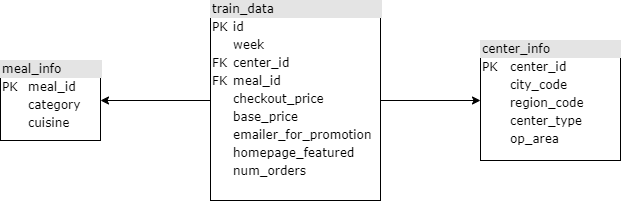



In [ ]:
# Unir base de centros de distribuição ao de pedidos - Explicar parâmetros ###

df_temp = pd.merge(train_data, center_info, how='inner', on='center_id')

In [ ]:
# Unir base de tipos de pedidos ao de pedidos - Explicar parâmetros ###

df_final = pd.merge(df_temp, meal_info, how='inner', on='meal_id')

In [ ]:
df_final

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


In [ ]:
# Estatística descritiva dos atributos da base de dados

df_final.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


**Principais destaques: média "checkout_price": 332.23; 
média "base_price": 354.15;
média "homepage_featured > média "emailer_for_promotion";
média "num_orders": 261.87, alto std;
média "op_area": 4.08 km2**

In [ ]:
df_final.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [ ]:
# Ordenar base de dados por semana (série temporal)

df_final = df_final.sort_values(by=['week'])

In [ ]:
# Verificando ranking the tipos de pedidos

category = df_final.groupby(['category'])['num_orders'].sum().sort_values(ascending=False).reset_index()
category

,category,num_orders
0,Beverages,40480525
1,Rice Bowl,20874063
2,Sandwich,17636782
3,Salad,10944336
4,Pizza,7383720
5,Other Snacks,4766293
6,Starters,4649122
7,Extras,3984979
8,Seafood,2715714
9,Desert,1940754


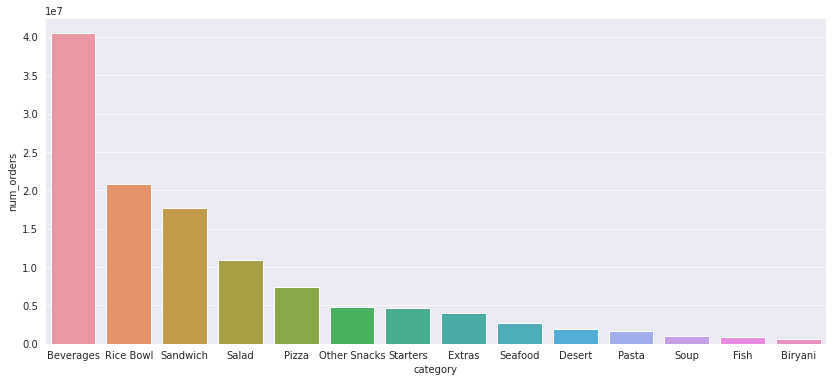

In [ ]:
# Gráfico das categorias de pedidos

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=category, x='category', y='num_orders', ax=ax)

In [ ]:
# Verificando ranking the tipos de culinária

count_cuisine = df_final.groupby(['cuisine'])['num_orders'].sum().sort_values(ascending=False).reset_index()
count_cuisine

,cuisine,num_orders
0,Italian,44172832
1,Thai,32677670
2,Indian,25792544
3,Continental,16914439


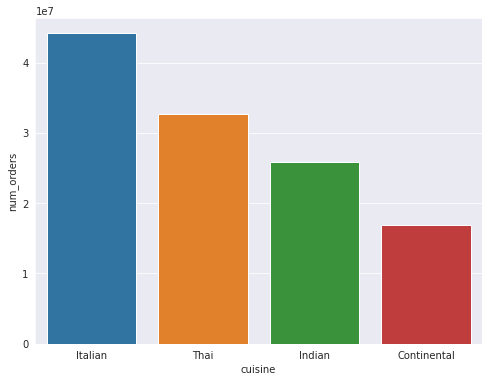

In [ ]:
# Gráfico dos tipos de culinária dos pedidos

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=count_cuisine, x='cuisine', y='num_orders', ax=ax)

## **Quais refeições são as mais vendidas? E as que trazem maior faturamento?**

In [ ]:
# Verificando ranking the tipos de pedidos

count_meal_id = df_final.groupby(['meal_id'])['num_orders'].sum().sort_values(ascending=False).head(10)
count_meal_id

meal_id
2290    9770303
1885    8346246
1754    6818059
1993    6656856
1109    6367773
2707    5932792
1971    5728620
2826    5090103
1727    4735987
1062    4712795
Name: num_orders, dtype: int64

In [ ]:
# Identificando ranking de pedidos pelo "meal_id"

for key, value in count_meal_id.items():
  print(meal_info[meal_info['meal_id']==key])

    meal_id   category cuisine
17     2290  Rice Bowl  Indian
   meal_id   category cuisine
0     1885  Beverages    Thai
    meal_id  category  cuisine
23     1754  Sandwich  Italian
   meal_id   category cuisine
1     1993  Beverages    Thai
    meal_id   category cuisine
16     1109  Rice Bowl  Indian
    meal_id   category  cuisine
10     2707  Beverages  Italian
    meal_id  category  cuisine
24     1971  Sandwich  Italian
    meal_id  category  cuisine
27     2826  Sandwich  Italian
    meal_id   category cuisine
35     1727  Rice Bowl  Indian
   meal_id   category  cuisine
6     1062  Beverages  Italian


Ranking mais vendidos: Rice Bowl (Indian), Beverages (Thai), Sandwich (Italian), Beverages (Thai) e Rice Bowl (Indian).


In [ ]:
# Criar coluna com o preço final x número de pedidos

df_final['total_price'] = df_final['checkout_price'] * df_final['num_orders']
df_final

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_price
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,111550.00
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,22983.00
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,20441.78
31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,90355.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364068,1126639,145,39,1247,446.23,446.23,0,0,14,526,34,TYPE_C,3.8,Biryani,Indian,6247.22
243852,1476913,145,75,1558,548.08,549.08,0,0,175,651,77,TYPE_B,4.7,Pizza,Continental,95914.00
130329,1193828,145,97,2290,272.60,271.60,0,0,473,628,77,TYPE_A,4.6,Rice Bowl,Indian,128939.80
26604,1188974,145,27,2539,158.14,158.14,0,0,244,713,85,TYPE_A,4.5,Beverages,Thai,38586.16


In [ ]:
# Calcular o faturamento por "meal_id"

total_order_price_id = df_final.groupby(['meal_id'])['total_price'].sum().sort_values(ascending=False).head(10)
total_order_price_id

meal_id
2290    2.445550e+09
1727    1.776754e+09
1754    1.752753e+09
1962    1.742114e+09
1109    1.659226e+09
2826    1.504060e+09
1971    1.406614e+09
2581    1.285972e+09
2707    1.223583e+09
2664    1.190095e+09
Name: total_price, dtype: float64

In [ ]:
# Identificando maiores faturamentos

for key, value in total_order_price_id.items():
  print(meal_info[meal_info['meal_id']==key])

    meal_id   category cuisine
17     2290  Rice Bowl  Indian
    meal_id   category cuisine
35     1727  Rice Bowl  Indian
    meal_id  category  cuisine
23     1754  Sandwich  Italian
    meal_id category      cuisine
44     1962    Pizza  Continental
    meal_id   category cuisine
16     1109  Rice Bowl  Indian
    meal_id  category  cuisine
27     2826  Sandwich  Italian
    meal_id  category  cuisine
24     1971  Sandwich  Italian
    meal_id category      cuisine
43     2581    Pizza  Continental
    meal_id   category  cuisine
10     2707  Beverages  Italian
    meal_id category  cuisine
28     2664    Salad  Italian


Ranking mais vendidos: Rice Bowl (Indian), Rice Bowl (Indian), Sandwich (Italian), Pizza (Continental) e Rice Bowl (Indian).

## **Quais são nossos melhores depósitos?**

In [ ]:
# Cálculo do total de ordens por Centro de distribuição

total_orders_center_id = df_final.groupby(['center_id', 'center_type'])['num_orders'].sum().sort_values(ascending=False).head(25).reset_index()
total_orders_center_id

,center_id,center_type,num_orders
0,13,TYPE_B,4296545
1,43,TYPE_A,3920294
2,10,TYPE_B,3381018
3,52,TYPE_B,3125835
4,137,TYPE_A,3117478
5,67,TYPE_B,2839493
6,11,TYPE_A,2797300
7,174,TYPE_A,2792587
8,104,TYPE_A,2427542
9,27,TYPE_A,2297698


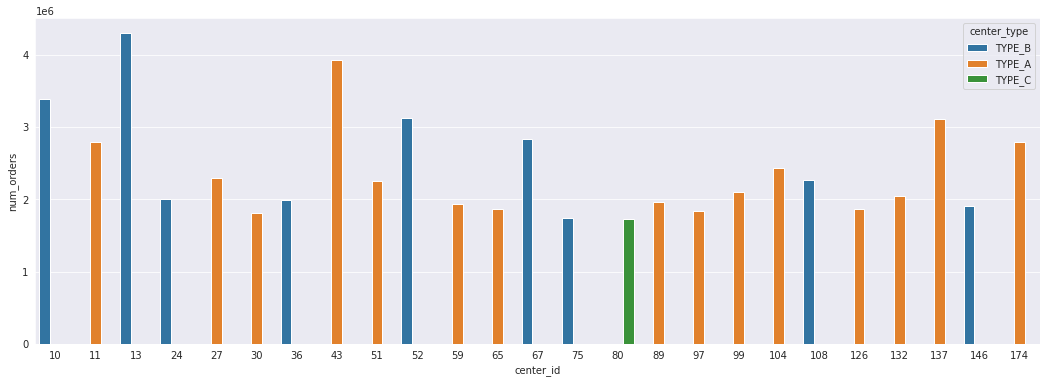

In [ ]:
# Gráfico dos Centros de distribuição com maior número de pedidos

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='center_id', y='num_orders', ax=ax, hue='center_type', data=total_orders_center_id)

In [ ]:
# Cálculo do total de ordens por tipo do Centro de distribuição

total_orders_type_center_id = df_final.groupby(['center_type'])['num_orders'].sum().sort_values(ascending=False).reset_index()
total_orders_type_center_id

,center_type,num_orders
0,TYPE_A,68978517
1,TYPE_B,29996073
2,TYPE_C,20582895


In [ ]:
# Cálculo do número de depósitos por tipo

numbers_type_center_id = df_final.groupby(['center_type'])['center_type'].value_counts()
numbers_type_center_id

center_type  center_type
TYPE_A       TYPE_A         262881
TYPE_B       TYPE_B          94074
TYPE_C       TYPE_C          99593
Name: center_type, dtype: int64

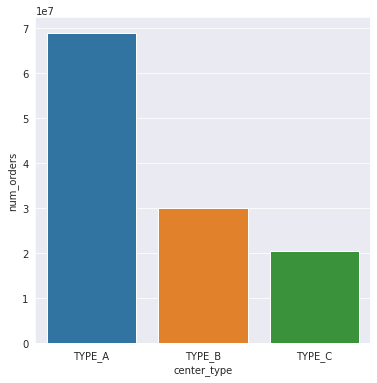

In [ ]:
# Gráfico dos tipos de Centros de distribuição com maior número de pedidos

fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='center_type', y='num_orders', ax=ax, data=total_orders_type_center_id)

## **Qual o preço médio das refeições?**

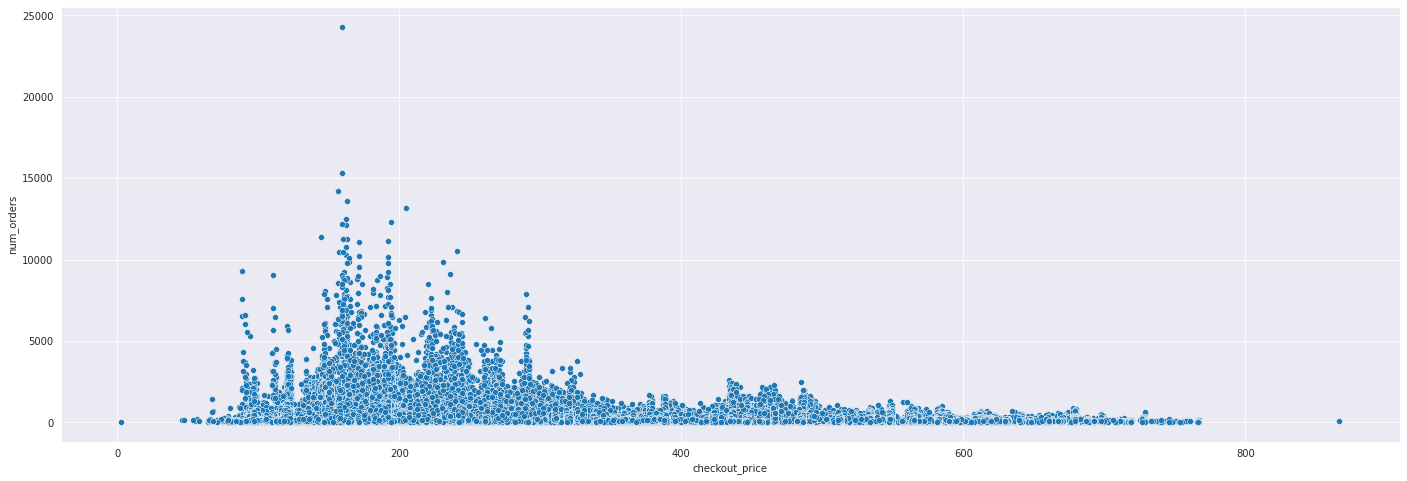

In [ ]:
# Gráfico de dispersão entre preço final e número de pedidos

y = df_final['num_orders']
x = df_final['checkout_price']

fig_dims = (24, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_final,y='num_orders',x='checkout_price', ax=ax)

In [ ]:
df_final.category.unique()

array(['Beverages', 'Other Snacks', 'Seafood', 'Desert', 'Pizza',
       'Biryani', 'Extras', 'Starters', 'Pasta', 'Rice Bowl', 'Sandwich',
       'Soup', 'Salad', 'Fish'], dtype=object)

In [ ]:
# Filtro na base de dados somente refeições (Sem bebidas)

total_orders_food = df_final[df_final['category']!='Beverages']
total_orders_food

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_price
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,111550.00
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,22983.00
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,20441.78
300141,1405620,1,13,1525,242.50,281.33,0,1,1202,590,56,TYPE_B,6.7,Other Snacks,Thai,291485.00
300277,1008177,1,109,1525,242.50,282.33,0,0,217,599,56,TYPE_A,3.6,Other Snacks,Thai,52622.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243994,1186057,145,177,1558,547.08,547.08,0,0,42,683,56,TYPE_A,3.4,Pizza,Continental,22977.36
364068,1126639,145,39,1247,446.23,446.23,0,0,14,526,34,TYPE_C,3.8,Biryani,Indian,6247.22
243852,1476913,145,75,1558,548.08,549.08,0,0,175,651,77,TYPE_B,4.7,Pizza,Continental,95914.00
130329,1193828,145,97,2290,272.60,271.60,0,0,473,628,77,TYPE_A,4.6,Rice Bowl,Indian,128939.80


In [ ]:
total_orders_food[['checkout_price', 'base_price']].describe()

,checkout_price,base_price
count,328658.000000,328658.000000
mean,378.535390,403.693396
std,145.228081,151.478209
min,55.350000,55.350000
25%,272.630000,287.150000
50%,324.010000,330.800000
75%,484.030000,503.430000
max,866.270000,866.270000


**A média das refeições é de 378.53 com desvio padrão de 145.23**

## **Anúncio por homepage ou e-mail?**

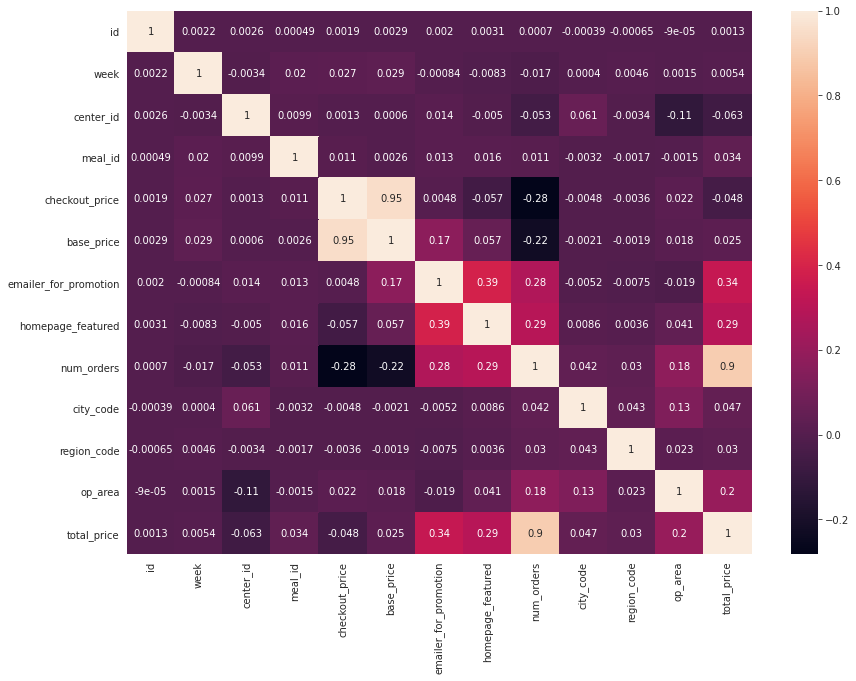

In [ ]:
# Matriz de correlação

mat_corr = df_final.corr()
fig = plt.figure(figsize = (14, 10))

sns.heatmap(mat_corr, annot = True)

**Observa-se na matriz de correlação, para o atributo "num_orders" existe correlação positiva com "homepage_featured" e "emailer_for_promotion" e negativa com "checkout_price".**

In [ ]:
# Filtro na base de dados somente com "emailer_for_promotion"	

total_orders_email = df_final[(df_final['emailer_for_promotion']==1) & (df_final['homepage_featured']==0)]
total_orders_email

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_price
255989,1174669,1,153,2581,581.03,611.13,1,0,270,590,56,TYPE_A,3.9,Pizza,Continental,156878.10
256276,1068195,1,161,2581,583.03,613.07,1,0,122,658,34,TYPE_B,3.9,Pizza,Continental,71129.66
256419,1039363,1,81,2581,582.03,611.13,1,0,283,526,34,TYPE_A,4.0,Pizza,Continental,164714.49
256564,1447733,1,26,2581,585.91,611.13,1,0,121,515,77,TYPE_C,3.0,Pizza,Continental,70895.11
256852,1183308,1,50,2581,582.03,614.07,1,0,162,556,77,TYPE_A,4.8,Pizza,Continental,94288.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77398,1382398,145,162,1062,160.05,158.17,1,0,95,526,34,TYPE_C,2.0,Beverages,Italian,15204.75
72205,1066191,145,110,1778,157.20,152.29,1,0,405,485,77,TYPE_A,3.8,Beverages,Italian,63666.00
77688,1149574,145,177,1062,155.26,154.26,1,0,688,683,56,TYPE_A,3.4,Beverages,Italian,106818.88
77543,1047314,145,75,1062,158.11,152.32,1,0,703,651,77,TYPE_B,4.7,Beverages,Italian,111151.33


In [ ]:
# Filtro na base de dados somente com "homepage_featured"	

total_orders_hp = df_final[(df_final['emailer_for_promotion']==0) & (df_final['homepage_featured']==1)]
total_orders_hp

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_price
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,111550.00
300141,1405620,1,13,1525,242.50,281.33,0,1,1202,590,56,TYPE_B,6.7,Other Snacks,Thai,291485.00
301744,1220934,1,99,1525,243.50,280.33,0,1,271,596,71,TYPE_A,4.5,Other Snacks,Thai,65988.50
30705,1371071,1,10,2539,133.86,126.16,0,1,647,590,56,TYPE_B,6.3,Beverages,Thai,86607.42
299371,1045856,1,61,2867,677.12,658.63,0,1,40,473,77,TYPE_A,4.5,Seafood,Continental,27084.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26894,1313072,145,106,2539,121.28,119.31,0,1,269,675,34,TYPE_A,4.0,Beverages,Thai,32624.32
283705,1393611,145,146,2444,728.53,727.53,0,1,96,526,34,TYPE_B,5.0,Seafood,Continental,69938.88
15833,1169531,145,27,1993,156.17,151.38,0,1,337,713,85,TYPE_A,4.5,Beverages,Thai,52629.29
318529,1213771,145,51,2704,319.13,321.13,0,1,162,638,56,TYPE_A,7.0,Other Snacks,Thai,51699.06


In [ ]:
# Filtro na base de dados sem "homepage_featured"	e "emailer_for_promotion"

total_orders_zero = df_final[(df_final['emailer_for_promotion']==0) & (df_final['homepage_featured']==0)]
total_orders_zero

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_price
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,22983.00
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,20441.78
31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,90355.50
300277,1008177,1,109,1525,242.50,282.33,0,0,217,599,56,TYPE_A,3.6,Other Snacks,Thai,52622.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364068,1126639,145,39,1247,446.23,446.23,0,0,14,526,34,TYPE_C,3.8,Biryani,Indian,6247.22
243852,1476913,145,75,1558,548.08,549.08,0,0,175,651,77,TYPE_B,4.7,Pizza,Continental,95914.00
130329,1193828,145,97,2290,272.60,271.60,0,0,473,628,77,TYPE_A,4.6,Rice Bowl,Indian,128939.80
26604,1188974,145,27,2539,158.14,158.14,0,0,244,713,85,TYPE_A,4.5,Beverages,Thai,38586.16


In [ ]:
# Cálculo do total de pedidos acumulados

df_final['num_orders'].sum()

119557485

In [ ]:
total_orders_email['num_orders'].sum()

7684936

In [ ]:
total_orders_hp['num_orders'].sum()

13960753

In [ ]:
total_orders_zero['num_orders'].sum()

82214568

**Verifica-se então que existem mais pedidos feitos quando há divulgação na homepage do que comparado com o e-mail, entretanto a grande maioria dos pedidos são feitos quando não há divulgação em nenhum dos dois meios, portanto a empresa poderia focar em aumentar a divulgação nas mídias, visto que existe uma correlação positiva.**

## **Tendência**

In [ ]:
# Cálculo do número de pedidos acumulados por semana

total_orders_wk = df_final.groupby(['week'])['num_orders'].sum()
total_orders_wk

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
141     776240
142     739661
143     759926
144     801197
145     671926
Name: num_orders, Length: 145, dtype: int64

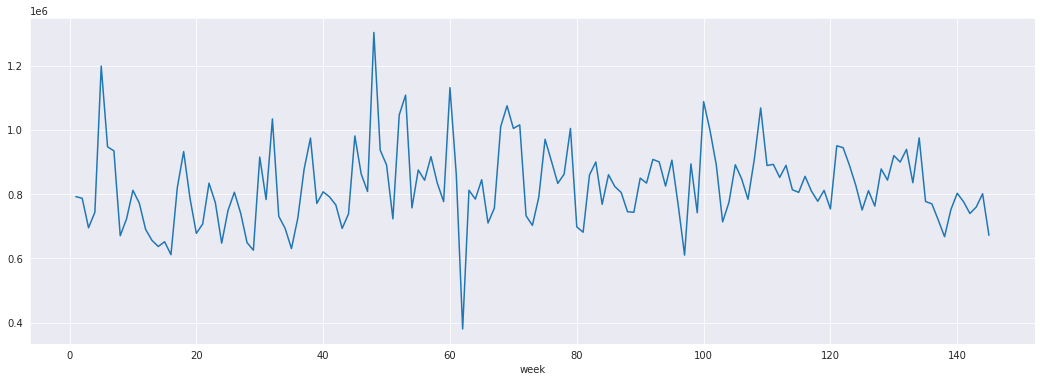

In [ ]:
# Gráfico de número de pedidos acumulados (semana) X tempo

sns.set_style("darkgrid")

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=total_orders_wk, x=total_orders_wk.index, y=total_orders_wk.values, ax=ax)

In [ ]:
# Cálculo da média móvel de 4

trend = pd.DataFrame(total_orders_wk)

trend['MA'] = trend.rolling(window=4).mean()
trend

,num_orders,MA
week,,
1,792261,NaN
2,787084,NaN
3,695262,NaN
4,743529,754534.00
5,1198675,856137.50
...,...,...
141,776240,749551.75
142,739661,767631.25
143,759926,769629.00


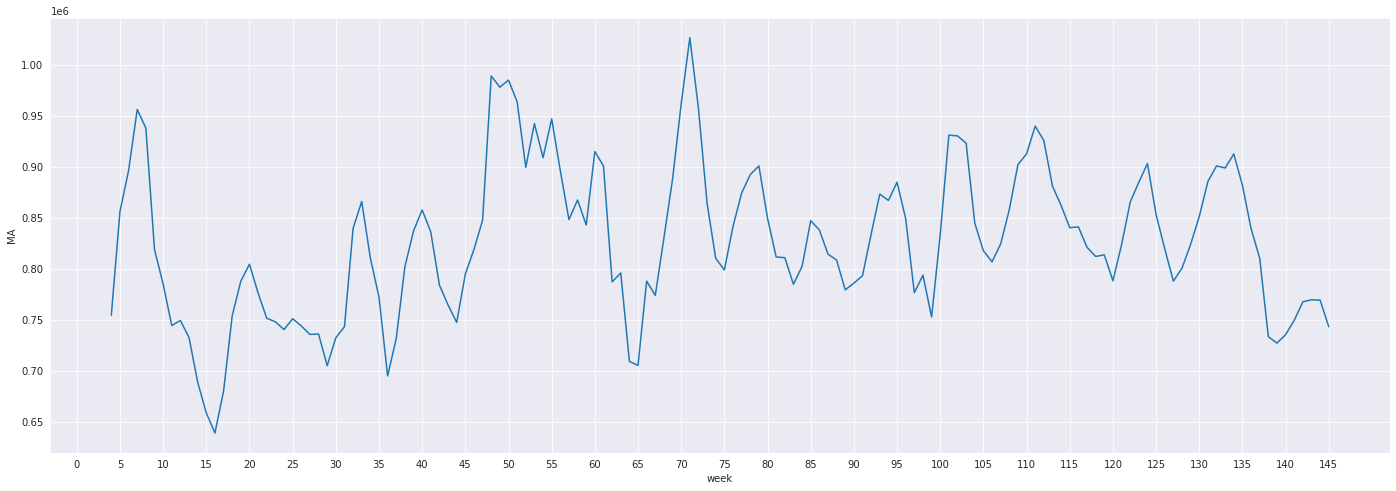

In [ ]:
# Gráfico da média móvel de 4

fig_dims = (24, 8)
fig, ax = plt.subplots(figsize=fig_dims)
graph = sns.lineplot(data=trend, x='week', y='MA', ax=ax)
graph.set_xticks(range(0,150,5));

**Máximas e mínimas locais separados por ~10 semanas, o que pode indicar sazonalidade.**

In [ ]:
# Cálculo do número de pedidos acumulados por semana por culinária

total_orders_cuisine = df_final[['week', 'cuisine', 'num_orders']]

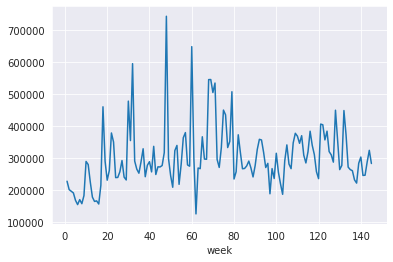

In [ ]:
total_orders_italian = total_orders_cuisine[total_orders_cuisine['cuisine']=='Italian']
total_orders_italian = total_orders_italian.groupby(['week'])['num_orders'].sum()

sns.lineplot(data=total_orders_italian, x=total_orders_italian.index, y=total_orders_italian.values)

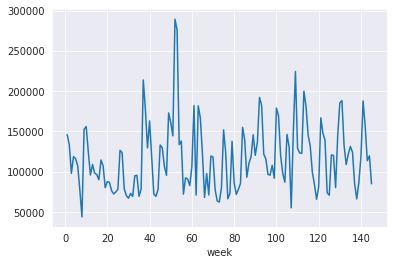

In [ ]:
total_orders_cont = total_orders_cuisine[total_orders_cuisine['cuisine']=='Continental']
total_orders_cont = total_orders_cont.groupby(['week'])['num_orders'].sum()

sns.lineplot(data=total_orders_cont, x=total_orders_cont.index, y=total_orders_cont.values)

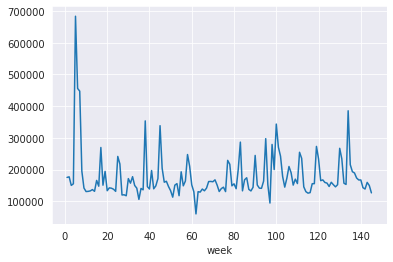

In [ ]:
total_orders_ind = total_orders_cuisine[total_orders_cuisine['cuisine']=='Indian']
total_orders_ind = total_orders_ind.groupby(['week'])['num_orders'].sum()

sns.lineplot(data=total_orders_ind, x=total_orders_ind.index, y=total_orders_ind.values)

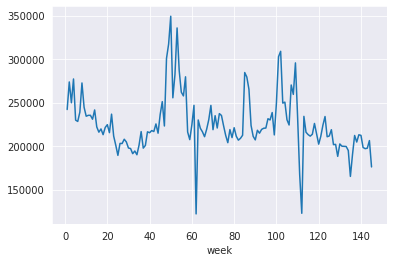

In [ ]:
total_orders_thai = total_orders_cuisine[total_orders_cuisine['cuisine']=='Thai']
total_orders_thai = total_orders_thai.groupby(['week'])['num_orders'].sum()

sns.lineplot(data=total_orders_thai, x=total_orders_thai.index, y=total_orders_thai.values)

In [ ]:
total_orders_wk.index = pd.date_range(start='1/1/2018', periods=145, freq='W')
total_orders_wk

2018-01-07     792261
2018-01-14     787084
2018-01-21     695262
2018-01-28     743529
2018-02-04    1198675
               ...   
2020-09-13     776240
2020-09-20     739661
2020-09-27     759926
2020-10-04     801197
2020-10-11     671926
Freq: W-SUN, Name: num_orders, Length: 145, dtype: int64

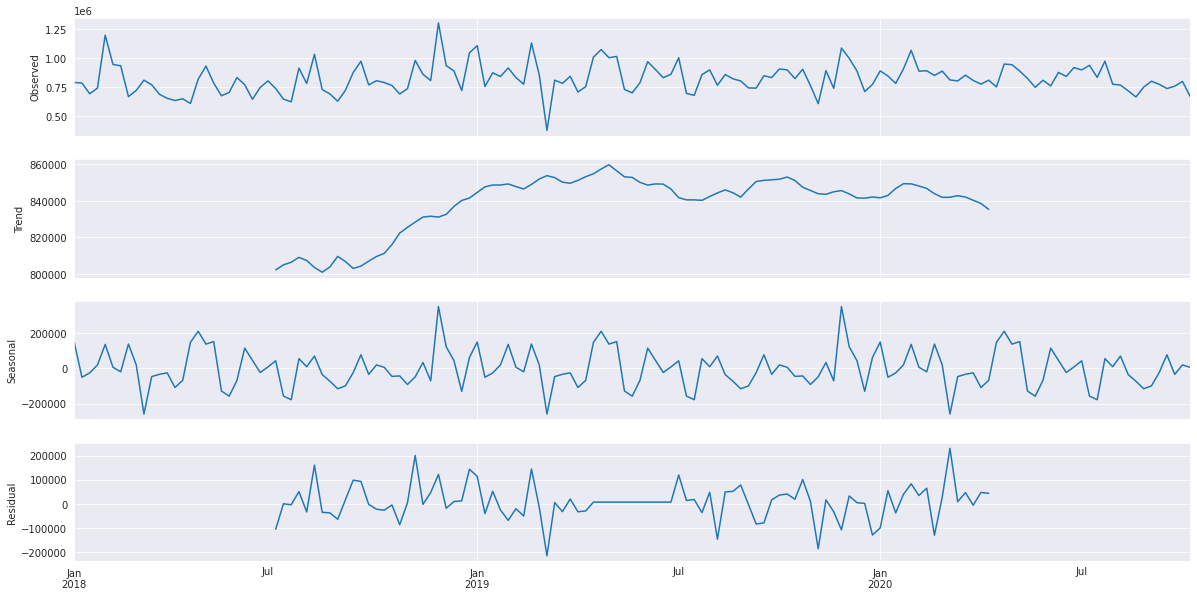

In [ ]:
# Decomposição de série temporal (Level, Trend, Seasonality e Noise)

import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(x=total_orders_wk, model='additive')

fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(20, 10))

res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
res.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
res.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()